<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/%EA%B4%91%ED%9B%88/img_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import os
# path = '/content/drive/MyDrive/Bone_detection/data/image/female'
# dir_list = os.listdir(path)
# print(dir_list)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Original Image Import ( Sample for Test )

In [9]:
test = '/content/drive/MyDrive/Bone_detection/data/image/male/009_M.jpg'

# Masking

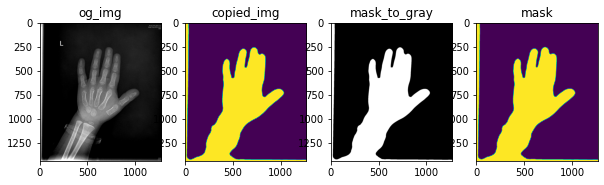

True

In [17]:
img = cv2.imread(test)
img_ = img.copy()

# 색상 lab으로 변경 ( 밝기 강조 )
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

# blurring : 커널은 홀수만 적용. 이미지 평균 기준으로 홀수값
blur_kernel = int((img_.mean()*0.5)//2)*2+1
img_ = cv2.medianBlur(img_,blur_kernel)

# 임계값 처리를 위해 grayscale로 변경
img_ = cv2.cvtColor(img_, cv2.COLOR_Lab2BGR)
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)

# 이미지 평균값으로 이진화.
# cv2. threshold(src;image(grayscale) , thresh; threshold , maxval; value over threshold, type; thresholding type)
return_, img_ = cv2.threshold(img_, img_.mean()*1.1, 255, cv2.THRESH_BINARY)

# 가장 큰 윤곽(contour) 값으로 masking
# cv2. findContours(src; image, searching mode, method )
contours, hierarchy = cv2.findContours(img_, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contours = max(contours, key = cv2.contourArea) # contourARea : 외곽선이 감싸는 영역의 면적 반환.
mask = np.zeros(img_.shape, dtype = np.uint8) # 마스크 생성

# mask + contours
cv2.drawContours(mask, [max_contours], -1, (255,255,255), -1)

# morphology 
# kernel에 함수 적용 ( blurring )
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (5,5))

# 최종 mask 생성
mask = cv2.dilate(mask,kernel) # 팽창적용

# 출력
plt.figure(figsize=(10, 10))

plt.subplot(141)
plt.imshow(img)
plt.title('og_img')

plt.subplot(142)
plt.imshow(img_)
plt.title('copied_img')

plt.subplot(143)
plt.imshow(img_,cmap='gray')
plt.title('mask_to_gray')

plt.subplot(144)
plt.imshow(mask)
plt.title('mask')

plt.show()

# 마스크 저장
path = '/content/drive/MyDrive/Bone_detection/code/sample_mask.jpg'
cv2.imwrite(path, mask)

# Remove background from og_img

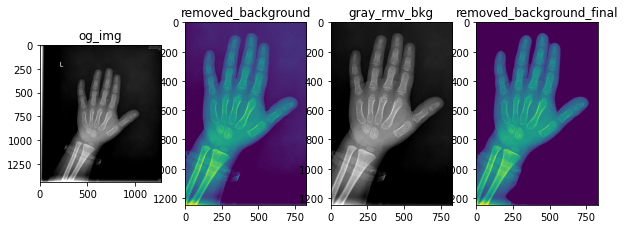

True

In [18]:
img = cv2.imread(test)
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_g.shape # 높낮이 확인

# 저장한 마스크 불러오기
mask = cv2.imread('/content/drive/MyDrive/Bone_detection/code/sample_mask.jpg', cv2.IMREAD_GRAYSCALE)
mask_list = mask.tolist()

# 테두리를 제외한 5%정도 떨어진 곳에서 경계점을 찾음.

# 테두리 윗부분 제거
for y in range(int(height*0.05),height):
  if max(mask[y,int(width*0.3):int(width*0.7)]) > 0:
    start_y = y-int(height*0.05)
    break

# 테두리 왼쪽
for x in range(int(width*0.05),width):
  if max(mask[int(height*0.3):int(height*0.7),x]) > 0:
    start_x = x-int(width*0.05)
    break

# 테두리 오른쪽
for x in range(int(width*0.95),-1,-1):
  if max(mask[int(height*0.3):int(height*0.7),x]) > 0:
    end_x = x+int(width*0.05)
    break

# # 테두리 아래쪽
cut_index = 0

# 흰색이 나오면 검은색이 나오는 부분 자르기
if mask_list[height-1][-1] == 255 or mask_list[height-1][0] == 255:
  for n in reversed(range(height)):
    if mask_list[n][0] == 0 or mask_list[n][-1] == 0:
      cut_index = n
      break

# 처음이 검정색이면 흼색이 나오는 부분까지 자르기
if mask_list[height-1][0] == 0 or mask_list[height-1][-1] == 0:
  for n in reversed(range(height)):
    if mask_list[n].count(255) > 100:
      cut_index = n
      break 

if cut_index == 0:
    cut_index = height

# 경계선 기준으로 이미지와 마스크 자름
img_g = img_g[start_y:(cut_index-1),start_x:end_x]
mask = mask[start_y:(cut_index-1),start_x:end_x]

masked = cv2.bitwise_and(img_g, mask)

# 출력 
plt.figure(figsize=(10, 10))

plt.subplot(141)
plt.imshow(img)
plt.title('og_img')

plt.subplot(142)
plt.imshow(img_g)
plt.title('removed_background')

plt.subplot(143)
plt.imshow(img_g,cmap='gray')
plt.title('gray_rmv_bkg')

plt.subplot(144)
plt.imshow(masked)
plt.title('removed_background_final')

plt.show()


# 경계선 수정 마스크 저장
path = '/content/drive/MyDrive/Bone_detection/code/sample_masked.jpg'
cv2.imwrite(path, masked)

# Rotation

True

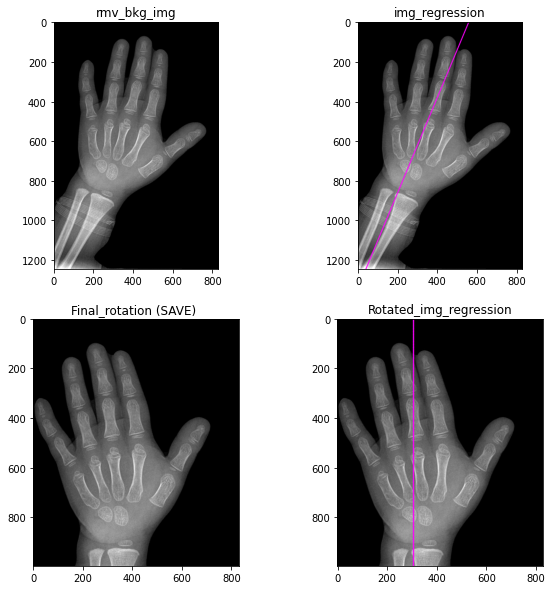

In [36]:
rmv_bkg_img = cv2.imread('/content/drive/MyDrive/Bone_detection/code/sample_masked.jpg')
# test copy 지정
img = og_img.copy()



# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< TEST SAMPLE : IMG >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 높이, 너비 지정
height, width = img.shape[:2] # (1004, 625, 3)(height, width, color)

# 임계값 처리를 위한 grayscale 지정
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )

# 90% upper , 95% lower 부분 기준점 thresh 생성
return_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
thresh_l = thresh.tolist()

# lower, upper 지정
# 밑에서 부터 처음 나오는 검은색이 나오는 부분 = lower
for i in reversed(range(height)):
    if thresh_l[i][0] == 0 and thresh_l[i][-1] == 0: # 밑에서 부터 검은색이 나오는 부분을 잡음
        lower = i
        break

# 맨 밑이 lower일 경우, 이미지의 95% 부분을 lower로 정의
if lower == height -1 : # 맨 밑이 lower 값으로 지정될경우 (height 1004 , lower 1003)
    lower = int(height*0.9) # 이미지 윗부분에서부터 90% 내려온 값이 lower로 재지정  # 903

# 높이의 5% 범위 지정
slice5 = int(len(thresh) * 0.05) # len(threshold_) == height 여기서는 높이의 5% 를 지정해줌 # 50

# lower에서 5% 윗 부분을 upper로 지정
upper = lower - slice5

# upper, lower 사이 5% 내 손목 가운데 지점 x,y 좌표 
x,y = [],[]
for i in range(slice5) : # upper, lower 사이 값. 높이의 5%
    cnt = thresh_l[i+upper].count(255) # 255, 흰색값 픽셀 개수만 추출 ##270
    index = thresh_l[i+upper].index(255) # 255값을 가진 픽셀의 제일 처음 나온 순서 추출. ##127
    x.append([i+upper])
    y.append([int((index*2 + cnt - 1)/2)])

# x,y 좌표 단순 선형회귀로 회귀선
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=x, y=y)

# 회귀선 적용
draw = cv2.line( img, (int(model.predict( [[0]] )), 0), (int(model.predict( [[height]] )), height), (255,0,255), 3)

# 검증용 
img_copy = img.copy()
draw = cv2.line( img_copy, (int(model.predict( [[0]] )), 0), (int(model.predict( [[height]] )), height), (255,0,255), 3)

# 회전 각도 계산
import math # atan2. 두 점의 상대적인 각도를 반환
angle = math.atan2(height - 0 , int(model.predict([[height]])) - int(model.predict([[0]]))) * 180 / math.pi 
## 소괄호 주의 !  ### 각도 = 역탄젠트값 구한 뒤, math.pi를 곱해주는 형식

# 회전 변환 array 생성
Move = cv2.getRotationMatrix2D( (width/2, height/2), angle-90, 1) # (회전중심좌표; tuple, 각도, 확대비율) ; array 변환

# warpAffine : 이동 변환. 이동 변환 array 생성
rotate = cv2.warpAffine( img_copy, Move, (width, height))

# 회전 부분 제거
for i in range (len(thresh[-1])): # 임계값 중 가장 큰 값들의 개수 지정
    if thresh[-1][i] == 255:  # 임계값이 최대치에 도착하는 그 인덱스를 start_x 로 잡음
        start_x = i
        break

for i in range(len(thresh[-1])) :
    if thresh[-1][i] == 255: # 임계값이 최대치에 도착하는 그 인덱스를 end_x 로 잡음
        end_x = i

# 기준점 적용
start_point = height - int( (int(model.predict([[height]]) - start_x)) * math.tan(math.pi * ((90-angle)/180)) )
end_point = height - int( (end_x - int(model.predict([[height]]) )) * math.tan(math.pi * ((angle-90)/ 180 )) )

# 기준 좌표의 가장 작은 값을 적용
point = min(start_point, end_point)

# 최종 회전
img_copy = rotate[:point]

# 출력

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(rmv_bkg_img)
plt.title('rmv_bkg_img')

plt.subplot(222)
plt.imshow(img)
plt.title('img_regression')

plt.subplot(224)
plt.imshow(img_copy)
plt.title('Rotated_img_regression')



# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< FINAL IMG : FINAL >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 최종 저장할 final copy 지정 ; 마지막에 처음부터 적용. 회귀선 제외 파일로 저장됨.
final = rmv_bkg_img.copy()

height, width = final.shape[:2]
gray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY )
return_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
thresh_l = thresh.tolist()
for i in reversed(range(height)):
    if thresh_l[i][0] == 0 and thresh_l[i][-1] == 0: 
        lower = i
        break
if lower == height -1 : 
    lower = int(height*0.9)
slice5 = int(len(thresh) * 0.05)
upper = lower - slice5
x,y = [],[]
for i in range(slice5) : 
    cnt = thresh_l[i+upper].count(255)
    index = thresh_l[i+upper].index(255)
    x.append([i+upper])
    y.append([int((index*2 + cnt - 1)/2)])
import math 
angle = math.atan2(height - 0 , int(model.predict([[height]])) - int(model.predict([[0]]))) * 180 / math.pi 
Move = cv2.getRotationMatrix2D( (width/2, height/2), angle-90, 1) 
rotate = cv2.warpAffine( final, Move, (width, height))
for i in range (len(thresh[-1])):
    if thresh[-1][i] == 255: 
        start_x = i
        break
for i in range(len(thresh[-1])) :
    if thresh[-1][i] == 255: 
        end_x = i
start_point = height - int( (int(model.predict([[height]]) - start_x)) * math.tan(math.pi * ((90-angle)/180)) )
end_point = height - int( (end_x - int(model.predict([[height]]) )) * math.tan(math.pi * ((angle-90)/ 180 )) )
point = min(start_point, end_point)
final = rotate[:point]

# final 출력
plt.subplot(223)
plt.imshow(final)
plt.title('Final_rotation (SAVE) ')


### 저장
path = '/content/drive/MyDrive/Bone_detection/code/rot_sample.jpg'
cv2.imwrite(path, final)

# Bone_Masking

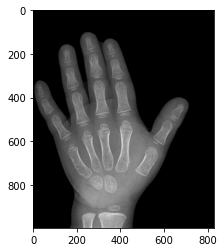

In [38]:
rg_img = cv2.imread('/content/drive/MyDrive/Bone_detection/code/rot_sample.jpg')

# test 사본저장
img = rg_img.copy()

# 내부 뼈 마스킹



# 출력
plt.imshow(rg_img)

In [47]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineTransformer',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',


In [63]:
model.predict([[0]]) #2차원 생성 - array([[240.48302521]])

array([[240.48302521]])

In [61]:
int(model.predict([[height]]))

264

In [60]:
cv2.line?

In [36]:
len(threshold_)

1004

In [22]:
threshold_list[1][-1]

0

In [35]:
cv2.threshold(img,127,255, cv2.THRESH_BINARY)

(127.0, array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8))

In [34]:
thresh1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)